In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv(r'twitter_training.csv', header=None)

In [45]:
data.columns = ['#', 'topic', 'sentiment', 'text']

In [46]:
data.dropna(inplace = True, axis = 0)

In [47]:
data

,#,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [48]:
data['upper_words'] = [np.sum([t.isupper() for t in text.split() if len(t) > 3]) for text in data['text']]

In [49]:
data.iloc[40538]

#                                                           1422
topic                                                Battlefield
sentiment                                             Irrelevant
text           Ban for Battlefield 4 player AglyGod has occur...
upper_words                                                    1
Name: 40916, dtype: object

In [50]:
tweet_upper = {'Positive':[],
            'Neutral':[],
            'Irrelevant':[],
            'Negative':[]}

for len_, t in zip(data['upper_words'], data[TARGET]):
    tweet_upper[t].append(int(len_))

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73996 entries, 0 to 74681
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #            73996 non-null  int64  
 1   topic        73996 non-null  object 
 2   sentiment    73996 non-null  object 
 3   text         73996 non-null  object 
 4   upper_words  73996 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.4+ MB


In [52]:
def column_by_sentiment(d, sentiment_column, target_column):
    result = {'Positive':[],
            'Neutral':[],
            'Irrelevant':[],
            'Negative':[]}

    for len_, t in zip(d[target_column], d[sentiment_column]):
        result[t].append(int(len_))
    return result

In [ ]:
column_by_sentiment(data, TARGET, 'upper_words')

<AxesSubplot:xlabel='upper_words', ylabel='sentiment'>

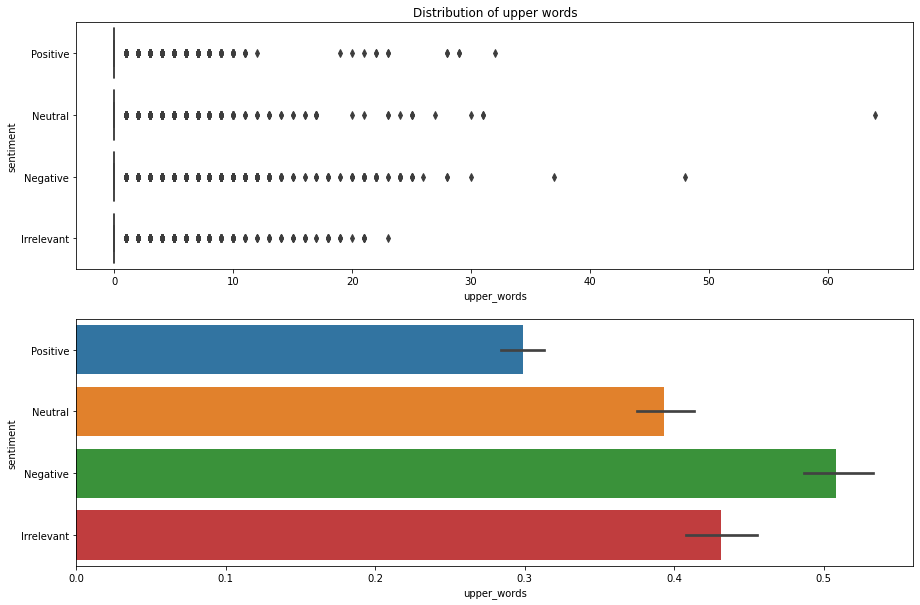

In [54]:
fig, axes = plt.subplots(2, 1, figsize=(15,10))
axes[0].set_title('Distribution of upper words')
sns.boxplot(x=data['upper_words'],y=data['sentiment'], ax = axes[0])
sns.barplot(data = data, x='upper_words',y='sentiment', ax = axes[1])

In [55]:
data.sort_values(by='upper_words', ascending = False)

,#,topic,sentiment,text,upper_words
39410,5564,Hearthstone,Neutral,KUZ YU VENT PUO. LOCK PHART FANG FANG FANG FAN...,64.0
5852,208,Amazon,Negative,Whoever orders it WITHOUT AMAZON WITHIN WITHIN...,48.0
49118,6032,FIFA,Negative,"NOW I HAVE RECEIVED MAIN, WHAT HAVE I ACCEIVED...",37.0
17150,9740,PlayStation5(PS5),Positive,LEAGUE'S FUCTION.LEAGUE'S PEOPLE-PEOPLE-PEOPLE...,32.0
39412,5564,Hearthstone,Neutral,CUZ YOU WENT IN POO. P SHERLOCK FART TO ANYTHI...,31.0
...,...,...,...,...,...
28204,454,ApexLegends,Neutral,My Happy 4th of july! ( formerly Apex World Le...,0.0
28205,454,ApexLegends,Neutral,Video Fun Day july! (Apex Legends) •.com/jjdab...,0.0
28206,455,ApexLegends,Negative,@PlayApex why has audio not been fixed ... its...,0.0
28207,455,ApexLegends,Negative,@ PlayApex why has audio not been fixed... it ...,0.0
